Here I plot correlation matrix and the interacion variables and select those who are more relevant

In [25]:
%run ../src/data/stratified_data.py

strat_train_set, strat_test_set 


In [26]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 288 to 277
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       232 non-null    float64
 1   anaemia                   232 non-null    int64  
 2   creatinine_phosphokinase  232 non-null    int64  
 3   diabetes                  232 non-null    int64  
 4   ejection_fraction         232 non-null    int64  
 5   high_blood_pressure       232 non-null    int64  
 6   platelets                 232 non-null    float64
 7   serum_creatinine          232 non-null    float64
 8   serum_sodium              232 non-null    int64  
 9   sex                       232 non-null    int64  
 10  smoking                   232 non-null    int64  
 11  time                      232 non-null    int64  
 12  DEATH_EVENT               232 non-null    int64  
 13  combination               232 non-null    object 
dtypes: float64(3)

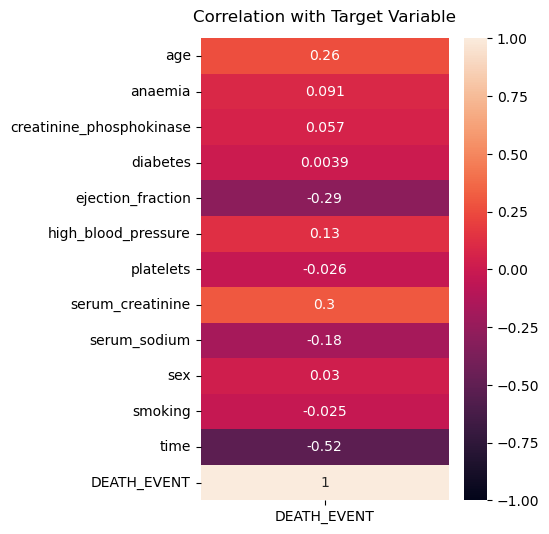

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Increase the size of the heatmap.
plt.figure(figsize=(4, 6))

heatmap = sns.heatmap(strat_train_set.iloc[:,:-1].corr()[['DEATH_EVENT']], vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation with Target Variable', fontdict={'fontsize':12}, pad=12);

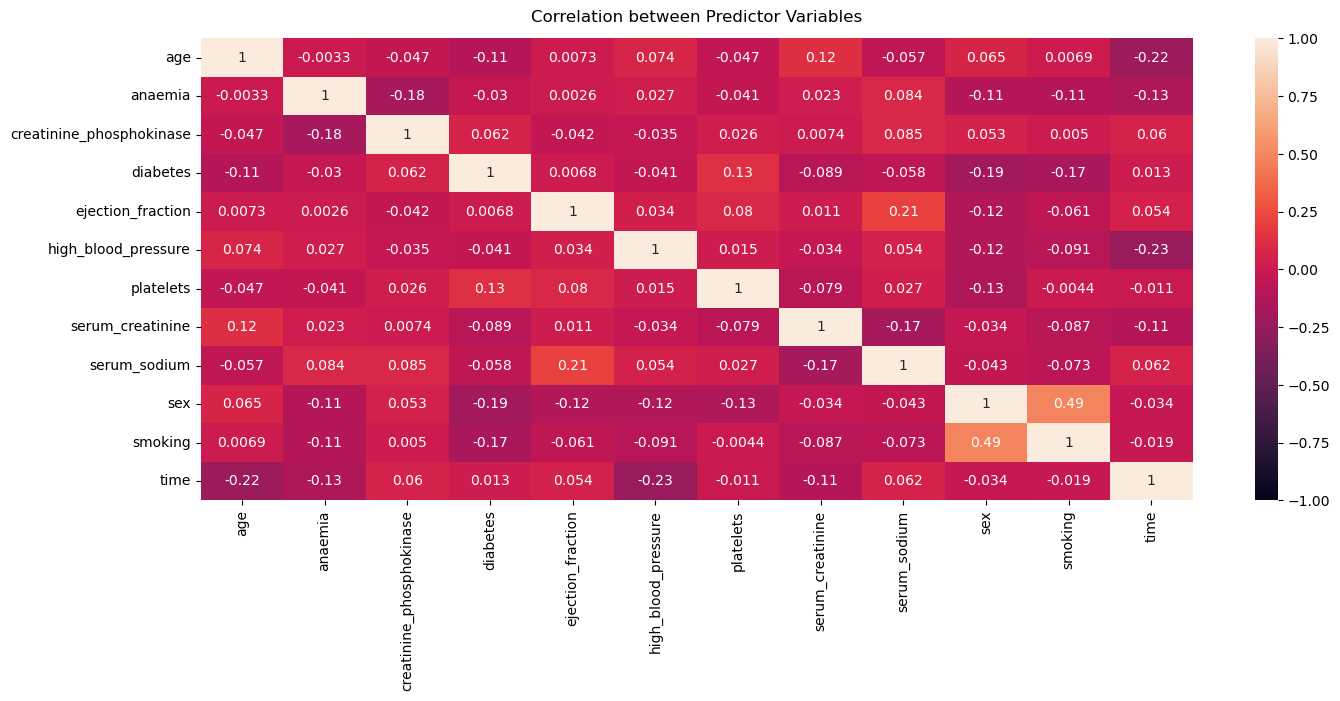

In [28]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(strat_train_set.iloc[:,:-2].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation between Predictor Variables', fontdict={'fontsize':12}, pad=12);

In [29]:
#Adding The class InteractionTermExtractor()

%run ../src/utils/interaction_term.py

InteractionTermExtractor(): fit(), transform(), get_feature_names_out()


In [30]:
#Adding the columns of each significant interaction term
interaction_terms =pd.DataFrame()

interaction_terms['age__time']= pd.DataFrame(InteractionTermExtractor().fit_transform(strat_train_set[["time","age"]])
                                              , index= strat_train_set.index)

interaction_terms['time__high_blood_pressure']= pd.DataFrame(InteractionTermExtractor().fit_transform(strat_train_set[["time","high_blood_pressure"]])
                                                            , index= strat_train_set.index)

interaction_terms['sex__smoking']= pd.DataFrame(InteractionTermExtractor().fit_transform(strat_train_set[["sex","smoking"]])
                                                , index= strat_train_set.index)

interaction_terms['DEATH_EVENT']=strat_train_set[["DEATH_EVENT"]]

interaction_terms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 288 to 277
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age__time                  232 non-null    float64
 1   time__high_blood_pressure  232 non-null    float64
 2   sex__smoking               232 non-null    float64
 3   DEATH_EVENT                232 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.1 KB


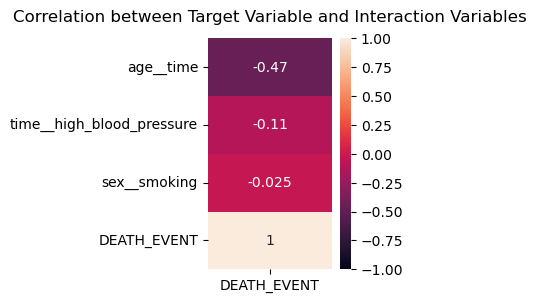

In [31]:
import seaborn as sns

# Increase the size of the heatmap.
plt.figure(figsize=(2, 3))

heatmap = sns.heatmap(interaction_terms.corr()[['DEATH_EVENT']], vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation between Target Variable and Interaction Variables', fontdict={'fontsize':12}, pad=12);

Text(0.5, 0, 'Age and Time Term')

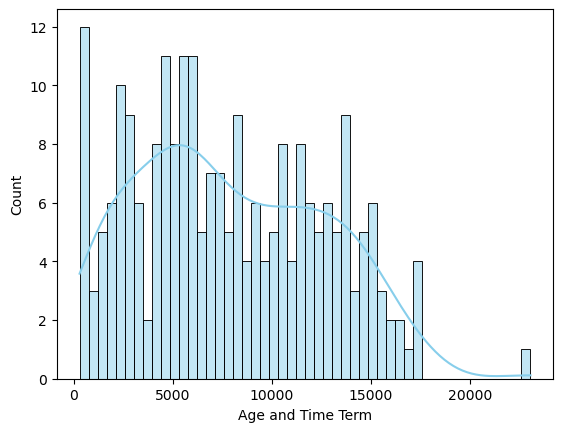

In [32]:
ax=sns.histplot(data=interaction_terms, x='age__time', kde=True, color="skyblue", bins=50)
ax.set_xlabel("Age and Time Term")

It is necessary to add a interaction term between Age and Time. However, the remaining interaction terms do not have a enough correlation to justify its adding in the model.